<a href="https://colab.research.google.com/github/Cooper-9/Notes-from-class/blob/main/Kapitza_Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pseudocode

### Define our equation of motion for pivot-drive pendulum


In the form of solve_ivp

In [1]:
# import modules
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# define equation of motion
def pivot_driven_pendulum(tau, y, epsilon, alpha, zeta):
  """
  tau: float
    dimensionless time: tau = omega_d * t
  alpha: float
    relative distplacement of the pivot ot the pendulum arm: alpha = y_0/l
  epsilon: float
    dimensionless frequency: epsilon = omega_0/omega_d
  zeta: float
    dimensionless damping coefficient
  Returns:
  dy_dtau: ndarray
    time derivatives of state variables

  """
  theta, ang_vel = y #unpack state variable
  dtheta_dtau = ang_vel #define angular velocity
  d2theta_dtau2 = -2*zeta*dtheta_dtau - (epsilon**2 - alpha*np.cos(tau))*np.sin(theta)
  dy_dtau = np.array([dtheta_dtau, d2theta_dtau2]) # pack variables
  return dy_dtau # return derivative

### Define utilities
1. **`Basic Plot`**:
2. **`alpha_critical`**: our gues for the boundary of the inverted state. Parameters are `zeta`, `epsilon`, `coefficient`; returns `alpha`.

In [ ]:
# define basic plot

In [ ]:
# define alpha_critical
def alpha_critical(epsilon, zeta, coefficient):
  """
  epsilon: float
    dimensionless frequency: epsilon = omega_0/omega_
  zeta: float
    dimensionless damping coefficient
  coefficient: float
    tuning parameter to help with fit
  Returns:
  alpha: float
    relative displacement of the pivot to the pendulum arm: alpha = y_0/l
  """
  alpha = coefficient*epsilon**2 # our guess at the moment (omits zeta)
  return alpha

### Solve the equation of motion

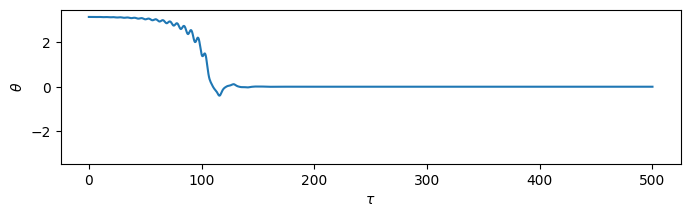

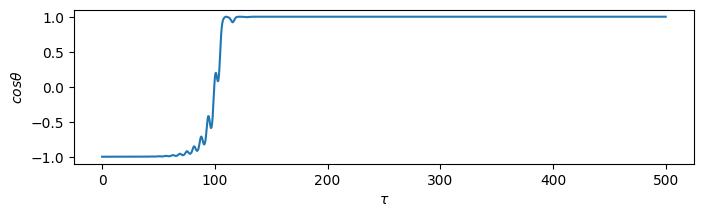

In [30]:
# input parameters
epsilon = 0.2
alpha = 0.25
zeta = 0.1

# number of decay times we want to integrate over
n_decay = 100

# define span of tau
tau_min = 0
tau_max = n_decay/(2*zeta)
tau_span = [tau_min, tau_max]

# define an initial state
delta_theta = 0.01 # deviation of theta from pi / inverted state
theta_0 = np.pi - delta_theta
ang_vel_0 = 0
y_0 = [theta_0, ang_vel_0]

# solve equation of motion
solution = solve_ivp(pivot_driven_pendulum, tau_span, y_0, args=(epsilon, alpha, zeta), method='Radau', dense_output = True)

# plot theta
tau_plot = np.linspace(tau_min, tau_max, 1000)
theta_plot = solution.sol(tau_plot)[0]

# plot theta
plt.figure(figsize=(8,2))
plt.plot(tau_plot, (theta_plot))
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\theta$')
plt.ylim(-np.pi*1.1, np.pi*1.1)
plt.show()

plt.figure(figsize=(8,2))
plt.plot(tau_plot, np.cos((theta_plot)))
plt.xlabel(r'$\tau$')
plt.ylabel(r'$cos\theta$')
plt.ylim(-1.1, 1.1)
plt.show()